# Detecting Insults in Social Commentary

## Description
Analyzing data related to insults found in social commentary to provide valuable insights into the use of language, sentiment, and discourse patterns in online discussions. 

This will be achieved through many methods such as:
- Text pre-processing
- Sentiment analysis


## Columns Description
- insults: two possible outputs (0, 1). 0 means no insults, 1 means it contains insults
- date: the date of the comment
- comment: the comment being analysed

## Objectives

### Insights
Provide valuable insights into the use of language, sentiment and discourse patterns

### Classification
classify into insults and not insults

### Frequency analysis 
Conduct a basic frequency analysis to identify the most common insults used in social commentary. This can help pinpoint which insults are more prevalent.

### Sentiment analysis 
Use sentiment analysis tools or natural language processing (NLP) techniques to categorize insults based on their sentiment (e.g., negative, neutral, or positive). This analysis can reveal the overall tone of the commentary.

### Contextual analysis
Analyze the context in which insults are used. Look for patterns in the topics or situations that trigger insults. Understanding the context can provide insights into the motivations behind the insults.

### Temporal analysis
Explore how the frequency and types of insults change over time. Are there specific events or trends that correlate with spikes in insulting language?






# Reading the data

In [2]:

import pandas as pd

df = pd.read_csv('../data/train.csv')
df.head(20)

,Insult,Date,Comment
0,1,20120618192155Z,"""You fuck your dad."""
1,0,20120528192215Z,"""i really don't understand your point.\xa0 It ..."
2,0,NaN,"""A\\xc2\\xa0majority of Canadians can and has ..."
3,0,NaN,"""listen if you dont wanna get married to a man..."
4,0,20120619094753Z,"""C\xe1c b\u1ea1n xu\u1ed1ng \u0111\u01b0\u1edd..."
5,0,20120620171226Z,"""@SDL OK, but I would hope they'd sign him to ..."
6,0,20120503012628Z,"""Yeah and where are you now?"""
7,1,NaN,"""shut the fuck up. you and the rest of your fa..."
8,1,20120502173553Z,"""Either you are fake or extremely stupid...may..."
9,1,20120620160512Z,"""That you are an idiot who understands neither..."


# Visuaising the data with insults vs no insults

0    2898
1    1049
Name: Insult, dtype: int64


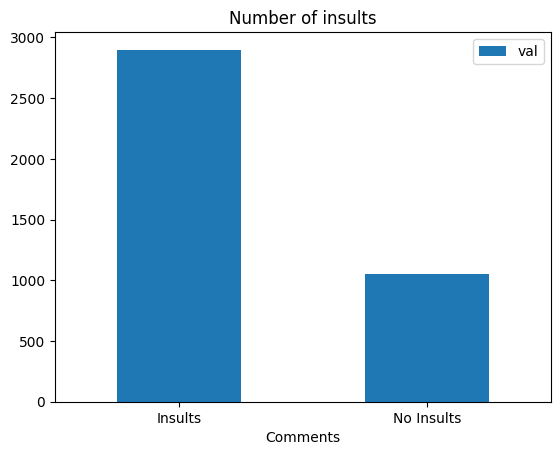

In [3]:
num = df['Insult'].value_counts()

print(num)

plot = pd.DataFrame({'Comments':['Insults', 'No Insults'], 'val':[num[0], num[1]]})
ax = plot.plot.bar(title='Number of insults',x='Comments', y='val', rot=0)

# Clean the data, only show data with insults

In [4]:
df_1 = df.dropna()
df_clean = df_1.query('Insult!=0')
df_clean.head(20)

,Insult,Date,Comment
0,1,20120618192155Z,"""You fuck your dad."""
8,1,20120502173553Z,"""Either you are fake or extremely stupid...may..."
9,1,20120620160512Z,"""That you are an idiot who understands neither..."
15,1,20120611090207Z,"""FOR SOME REASON U SOUND RETARDED. LOL. DAMN. ..."
16,1,20120320162532Z,"""You with the 'racist' screen name\n\nYou are ..."
18,1,20120320075347Z,"""your such a dickhead..."""
19,1,20120320203947Z,"""Your a retard go post your head up your #%&*"""
34,1,20120515132156Z,"""Allinit123, your\xa0hypocrisy\xa0is sickening..."
37,1,20120620161958Z,"""I can't believe the stupid people on this sit..."
38,1,20120609163743Z,"""fucking behave then you prick!"""


# Visualise the data in a wordcloud

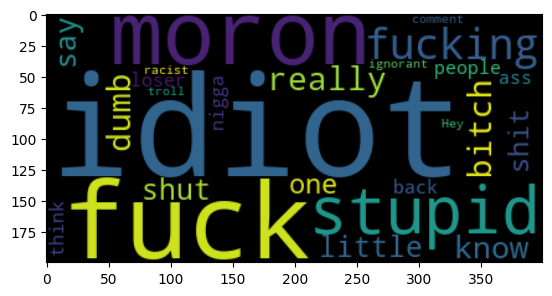

In [6]:

from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re

text = df_clean['Comment'].to_string(index=False)
processed_text = re.sub(r'\bxa0\b', '', text)

wordcloud = WordCloud(max_words=25, min_word_length=3).generate(processed_text)

plt.imshow(wordcloud, interpolation="bilinear")
plt.show()